In [2]:
!nvidia-smi

Wed Jan 17 08:47:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       On  | 00000000:00:1E.0 Off |                    0 |
| N/A   31C    P8               9W /  70W |      2MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

image size:  (768, 1024)


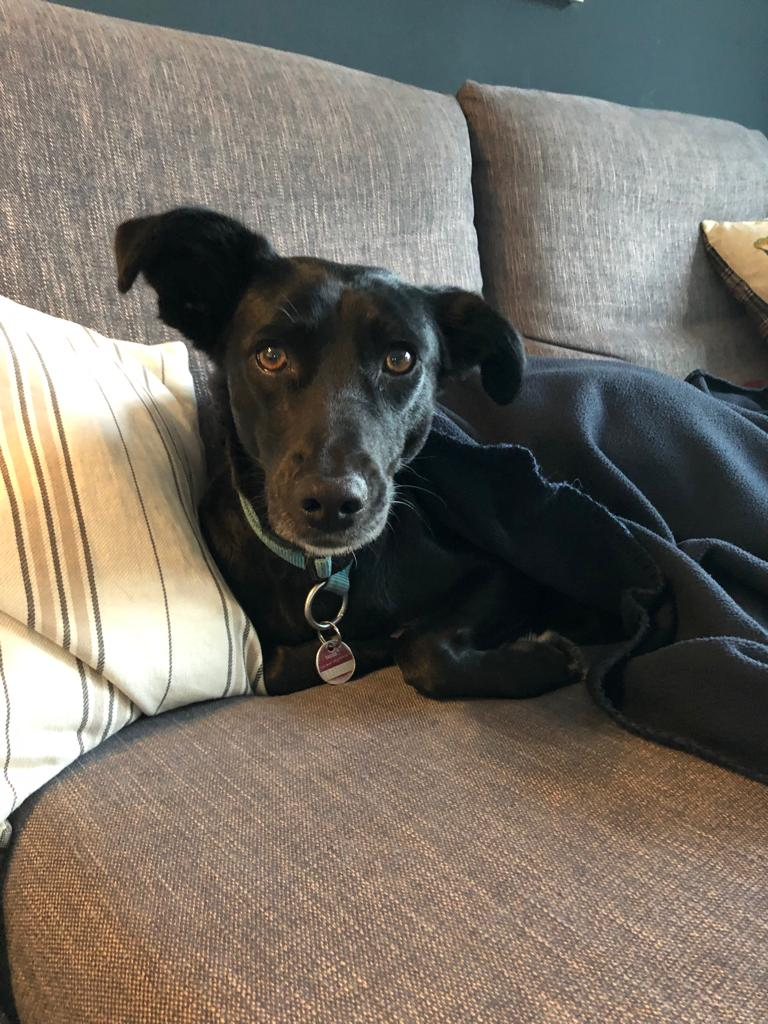

In [15]:
#%%
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# %% import image
img = Image.open('kiki.jpg')

print("image size: ", img.size)

img


# Augmentation

In [11]:

# %% compose a series of steps
preprocess_steps = transforms.Compose([
    transforms.Resize(300),  # better (300, 300)
    transforms.RandomRotation(50),
    transforms.CenterCrop(500),
    transforms.Grayscale(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
   
])
x = preprocess_steps(img)

print(x.shape)


torch.Size([1, 500, 500])


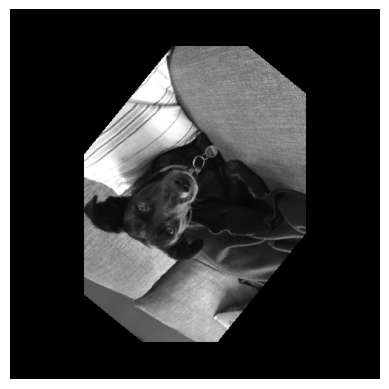

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x.permute(1, 2, 0), cmap='gray')
plt.axis('off')
plt.show()


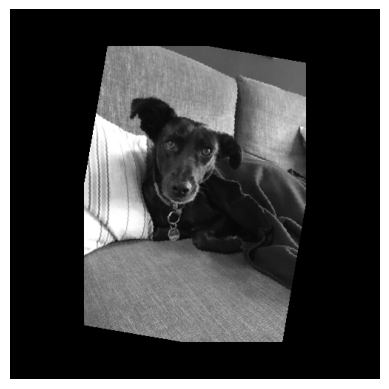

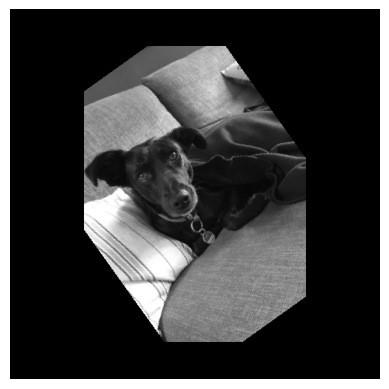

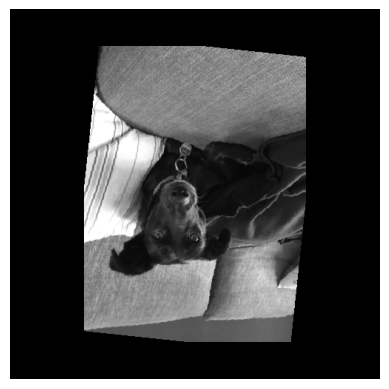

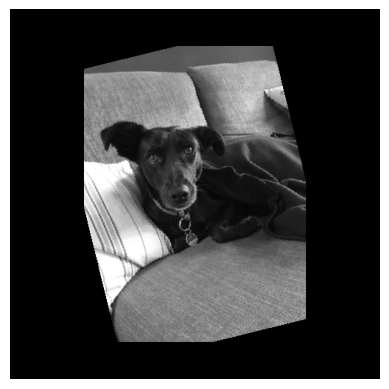

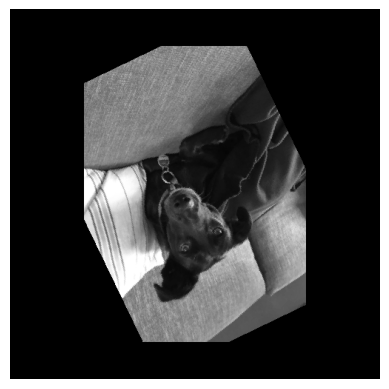

In [17]:
for i in range(5):
    x = preprocess_steps(img)
    plt.imshow(x.permute(1, 2, 0), cmap='gray')
    plt.axis('off')
    plt.show()

In [13]:

# %% get the mean and std of given image
x.mean([1, 2]), x.std([1, 2])

(tensor([0.1645]), tensor([0.2629]))